Analysis

1.  A large percentage of tweets are neutral in sentiment.
2.  CBS and BBC have the most positive overall sentiment, wheras CNN and NYTimes have a slight negative sentiment.
3.  Fox is nearly neutral in sentiment.
4.  Surprisingly, at the time of this analysis, the sentiment of these media sources were skewed to the positive side.

In [56]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from matplotlib.font_manager import FontProperties

In [57]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [58]:
# Twitter API Keys
with open("../API_TAT.txt") as key:
    access_token = key.readlines()
with open("../API_TATS.txt") as key:
    access_token_secret = key.readlines()
with open("../API_TCK.txt") as key:
    consumer_key = key.readlines()
with open("../API_TCS.txt") as key:
    consumer_secret = key.readlines()
#print(access_token, access_token_secret, consumer_key, consumer_secret)

In [59]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [60]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [61]:
# Variables for holding sentiments
sentiments = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                               "Account": user,
                               "Text": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter = counter + 1

In [62]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,@BBC,0.0000,Thu Mar 08 21:28:00 +0000 2018,1.000,0.000,0.000,This Ancient Egyptian pharaoh invested more in...,1
1,@BBC,-0.2732,Thu Mar 08 21:00:04 +0000 2018,0.845,0.103,0.052,"""No matter where in the world, when civilisati...",2
2,@BBC,0.4019,Thu Mar 08 20:33:04 +0000 2018,0.856,0.000,0.144,Jack Jarvis and Victor McDade are back for ano...,3
3,@BBC,0.0000,Thu Mar 08 20:03:04 +0000 2018,1.000,0.000,0.000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,4
4,@BBC,0.0000,Thu Mar 08 18:00:06 +0000 2018,1.000,0.000,0.000,What advice would YOU give your younger self? ...,5
5,@BBC,-0.1027,Thu Mar 08 17:30:11 +0000 2018,0.664,0.177,0.159,"In recognition of International Women’s Day, a...",6
6,@BBC,0.0000,Thu Mar 08 17:00:09 +0000 2018,1.000,0.000,0.000,🔬 More than half of the UK can't name a famous...,7
7,@BBC,0.5719,Thu Mar 08 16:30:05 +0000 2018,0.764,0.000,0.236,✍️🙌 Lotte Reiniger is the unsung heroine of ea...,8
8,@BBC,0.5803,Thu Mar 08 16:05:42 +0000 2018,0.819,0.000,0.181,RT @BBCMOTD: Favourite emoji?\nChampions Leagu...,9
9,@BBC,0.0000,Thu Mar 08 15:30:09 +0000 2018,1.000,0.000,0.000,⚽️🥅 The story of the fall and rise of women's ...,10


In [63]:
# Export file as a CSV
sentiments_pd.to_csv("Sentiment_data.csv", header=True)

In [64]:
account_colors = sentiments_pd.replace({"@BBC":"lightblue","@CBS":"green","@CNN":"red","@FoxNews":"darkblue","@nytimes":"yellow"})
account_colors.head()


,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,lightblue,0.0000,Thu Mar 08 21:28:00 +0000 2018,1.000,0.000,0.000,This Ancient Egyptian pharaoh invested more in...,1
1,lightblue,-0.2732,Thu Mar 08 21:00:04 +0000 2018,0.845,0.103,0.052,"""No matter where in the world, when civilisati...",2
2,lightblue,0.4019,Thu Mar 08 20:33:04 +0000 2018,0.856,0.000,0.144,Jack Jarvis and Victor McDade are back for ano...,3
3,lightblue,0.0000,Thu Mar 08 20:03:04 +0000 2018,1.000,0.000,0.000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,4
4,lightblue,0.0000,Thu Mar 08 18:00:06 +0000 2018,1.000,0.000,0.000,What advice would YOU give your younger self? ...,5


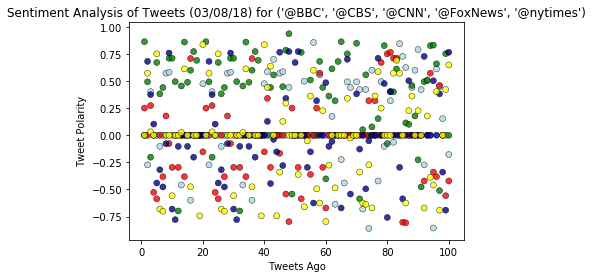

In [65]:
# Create scatter plot
plt.scatter(sentiments_pd["Tweets Ago"], sentiments_pd["Compound"], marker="o", facecolors=account_colors["Account"], 
            edgecolors='black', label=sentiments_pd["Account"], linewidth=0.5, alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plt.legend(loc='upper center')

# Save the figure
plt.savefig("Sentiment_Scatterplot.png")

plt.show()

In [66]:
account_sentiments = sentiments_pd.groupby(by="Account")
account_sentiment_average = account_sentiments["Compound"].mean()
print(account_sentiment_average)

Account
@BBC        0.119638
@CBS        0.306227
@CNN       -0.036383
@FoxNews    0.005646
@nytimes   -0.023686
Name: Compound, dtype: float64


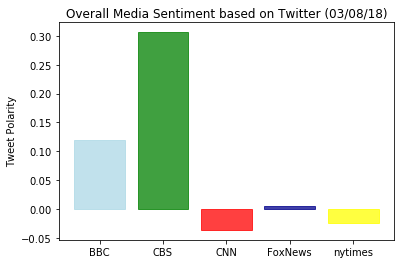

In [68]:
# Create bar chart
labels = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]
colors = ["lightblue", "green", "red", "darkblue", "yellow"]
x_axis = np.arange(0, len(target_user))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
    
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.xticks(tick_locations, labels)
plt.ylabel("Tweet Polarity")

x = range(5)
barlist=plt.bar(x, account_sentiment_average, facecolor='darkblue', alpha=0.75, align="edge")
barlist[0].set_color("lightblue")
barlist[1].set_color("green")
barlist[2].set_color("red")
barlist[3].set_color("darkblue")
barlist[4].set_color("yellow")

# Save the figure
plt.savefig("Overall_Sentiment_Bar_Chart.png")

plt.show()